In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
import random as random

datos = np.loadtxt('tiempos.txt', skiprows=1)

datos = datos[:,1:]  # Soleado | Nublado | Lluvia
datos[6,2] = 18.9    # Corregimos dato mal ingresado.
print (datos)

I_SOLEADO, I_NUBLADO, I_LLUVIA = range(3)

[[ 11.1  11.3  19.4]
 [ 13.   12.8  18.2]
 [ 16.1  16.   19. ]
 [ 14.5  14.1  18.9]
 [ 12.   12.5  19.1]
 [ 11.   11.6  18.7]
 [ 15.1  14.6  18.9]
 [ 14.4  14.2  19.9]
 [ 16.1  16.1  18.5]
 [ 17.   16.7  19.2]
 [ 12.2  12.4  18.8]
 [ 14.4  14.1  19.2]]


Corregimos un dato que consideramos fue mal ingresado, por ser un orden de magniutd mayor a todos los demás y no tener punto de separación decimal, lo cual nos da la pauta de que el punto iría ubicado dejando un dígito decimal, como en todos los demás datos. Otras opciones que consideramos fueron abandonar esa muestra completa, o trabajar con el dato tal cual está.

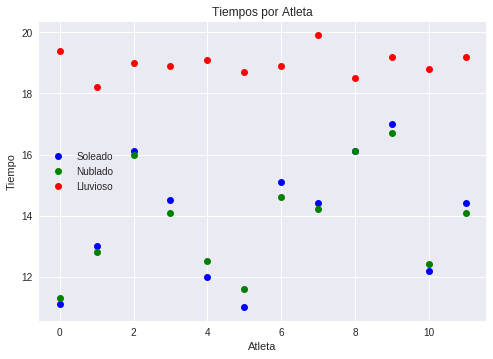

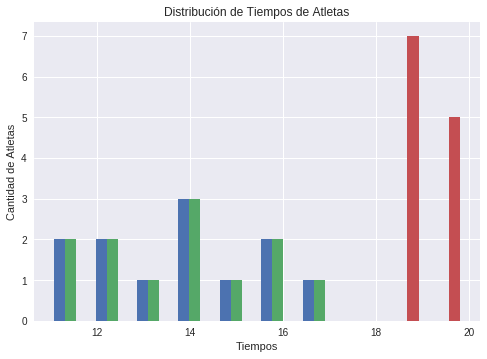

In [81]:
plt.plot(datos[:,I_SOLEADO], 'bo', label='Soleado')
plt.plot(datos[:,I_NUBLADO], 'go', label='Nublado')
plt.plot(datos[:,I_LLUVIA], 'ro', label='Lluvioso')
plt.title('Tiempos por Atleta')
plt.xlabel('Atleta')
plt.ylabel('Tiempo')
plt.legend()
plt.show()

plt.hist(datos)
#plt.hist(datos[:,I_SOLEADO], label='Soleado', bins=12, alpha=0.8)
#plt.hist(datos[:,I_NUBLADO], label='Nublado', bins=12, alpha=0.8)
#plt.hist(datos[:,I_LLUVIA], label='Lluvioso', bins=12, alpha=0.8)
plt.title('Distribución de Tiempos de Atletas')
plt.xlabel('Tiempos')
plt.ylabel('Cantidad de Atletas')
#plt.legend()
plt.show()

### Test de t
Los datos vienen de forma |Soleado|Nublado|Lluvia|

- Los atletas son más lentos en dı́as de lluvia que en dı́as soleados.

Primer Test.
Suponemos como hipótesis nula que los tiempos de los atletas tienen menor o igual media si está Lluvioso que si está Soleado

In [38]:
stat, pval = stats.ttest_rel(datos[:,I_SOLEADO], datos[:,I_LLUVIA], )  
print ("stat:", stat)
print ("pval/2:", pval/2)

stat: -8.57622757259
pval/2: 1.67582558036e-06


Como el p-valor es muy pequeño y el estadístico es negativo, parecería haber evidencia suficiente para rechazar la hipótesis nula. Con una gran confianza podemos afirmar que los atletas corren más rápido en días soleados que en días lluviosos

- El cielo nublado no influye en los tiempos de los atletas.

Asumimos que la afirmación se refiere a la comparación con días soleados. Por lo tanto, vamos a comparar los tiempos de los atletas para días soleados y para días nublados usando el mismo test anterior.

Nuestra hipótesis nula en este caso será que el cielo nublado no influye en los tiempos de los atletas. Bajo esa hipótesis, el t-estadístico tendría distribución t-student.

In [40]:
stat, pval = stats.ttest_rel(datos[:,I_SOLEADO], datos[:,I_NUBLADO], )  
print ("stat:", stat)
print ("pval/2:", pval/2)

stat: 0.412138249861
pval/2: 0.34407780578


Al tener un p-valor grande, no podemos descartar la hipótesis nula. Aunque tampoco podemos afirmar que el estado del cielo no tenga influcencia sobre los tiempos de los atletas.

- La velocidad en dı́as de lluvia es independiente del atleta.

Nuestra intuición nos decía que esta hipótesis podía testearse analizando la varianza de la muestra en días de lluvia y concluir, de ser muy baja, que los tiempos son independientes. Sin embargo, resultó errada: una carrera de horas en donde todos los atletas llegan con segundos de diferencia tendría una varianza bajísima, pero eso no da información sobre la independencia entre los tiempos y los atletas.

En su lugar, decidimos intentar un test de correlación entre los tiempos de los atletas en días soleados y de lluvia. Si la velocidad en días de lluvia es independiente del atleta, esperamos ver baja correlación.

Para esto estamos usando una hipótesis extra, que es que la velocidad en días soleados sí depende del atleta. Para darle mayor solidez a nuestro test, calcularemos también la correlación entre días soleados y días nublados. Esperamos ver que esta correlación sea mucho más fuerte que la anterior, resaltando la diferencia específica entre los días de lluvia y los días sin lluvia.

En primer lugar, realizaremos scatter plots de ambas relaciones (es decir, para cada atleta, sus tiempos en día Soleado y Nublado/Lluvioso). Veamos si es posible identificar correlaciones a simple vista.

/home/alpamayo/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


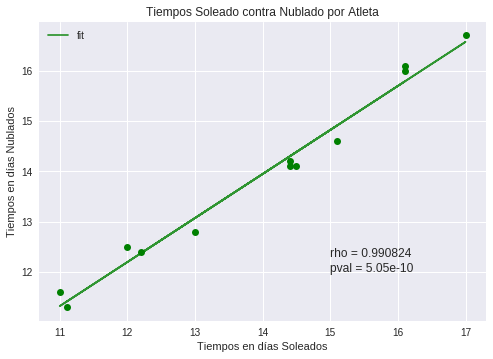

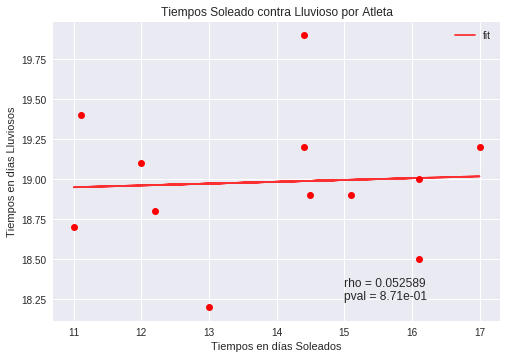

In [79]:
def lineal(x, a, b, c):
    return a * x + c

plt.plot(datos[:,I_SOLEADO], datos[:,I_NUBLADO], 'go')
plt.title('Tiempos Soleado contra Nublado por Atleta')
plt.xlabel('Tiempos en días Soleados')
plt.ylabel('Tiempos en días Nublados')

popt, pcov = curve_fit(lineal, datos[:,I_SOLEADO], datos[:,I_NUBLADO])
yfit = lineal(datos[:,I_SOLEADO], *popt)
plt.plot(datos[:,I_SOLEADO], yfit, 'g-', alpha=.8, label='fit')

rho, pval = stats.pearsonr(datos[:,I_SOLEADO], datos[:,I_NUBLADO])
plt.text(15, 12.3, r'rho = %.6f'%rho)
plt.text(15, 12, r'pval = %.2e'%pval)

plt.legend()
plt.show()



plt.plot(datos[:,I_SOLEADO], datos[:,I_LLUVIA], 'ro')
plt.title('Tiempos Soleado contra Lluvioso por Atleta')
plt.xlabel('Tiempos en días Soleados')
plt.ylabel('Tiempos en días Lluviosos')

popt, pcov = curve_fit(lineal, datos[:,I_SOLEADO], datos[:,I_LLUVIA])
yfit = lineal(datos[:,I_SOLEADO], *popt)
plt.plot(datos[:,I_SOLEADO], yfit, 'r-', alpha=.8, label='fit')

rho, pval = stats.pearsonr(datos[:,I_SOLEADO], datos[:,I_LLUVIA])
plt.text(15, 18.33, r'rho = %.6f'%rho)
plt.text(15, 18.25, r'pval = %.2e'%pval)

plt.legend()
plt.show()

En los gráficos podemos observar claramente que hay una tendencia entre los tiempos en días nublados y soleados: atletas más lentos en días soleados, lo son también cuando hay nubes en el cielo. Por otro lado, cuando comparamos contra los días de lluvia, los datos aparecen dispersos. Veamos si, al hacer las cuentas, podemos corroborar nuestro análisis visual.

Vemos que la correlación entre el atletas y sus velocidades en días de sol y en días con lluvia es baja. Por el contrario, la correlación es fuerte entre los dos tipos de días sin lluvia. Podemos concluir a raíz de esto que la velocidad en días de lluvia pareciera ser independiente del atleta, aunque harían falta más muestras para darle más fuerza a la hipótesis.

- El clima influye en la velocidad de los atletas.

La hipótesis así planteada resulta ambigua. Proponemos analizar la hipótesis como "la lluvia hace que el conjunto de atletas corra más lento". De confirmarla, estaríamos en condiciones de decir que el clima influye en la velocidad, dado que la lluvia es un posible escenario climático.

Como esta pregunta ya la analizamos, proponemos un nuevo test para dirimirla, en este caso uno de permutaciones.





In [ ]:
tiempos_lluvia = datos[:,I_LLUVIA]
tiempos_sol = datos[:,I_SOLEADO]
diferencia_medias = np.mean(tiempos_lluvia) - np.mean(tiempos_sol)
n = len(tiempos_lluvia)
todos = np.concatenate((tiempos_lluvia, tiempos_sol))
diferencias = []
for i in range(2000000):
    random.shuffle(todos)
    diferencias.append(np.mean(todos[:n]) - np.mean(todos[n:]))
    
plt.hist(diferencias, bins=25)
plt.axvline(x=diferencia_medias)
plt.show()

np.sum([i >= diferencia_medias for i in diferencias])

In [ ]:
p = (np.sum([i >= diferencia_medias for i in diferencias]) + 1) / 2000000
p

A pesar de usar 2 millones de permutaciones encontramos 2 que dan una diferencia de medias mayor o igual a la que vemos en los datos originales. Esto nos da suficiente confianza para afirmar que la lluvia en particular tiene influencia en los tiempos, y por lo tanto, el clima en general tiene influencia.

Es importante notar que esto sucede porque todos los tiempos en día lluvioso son más altos que todos los de día soleado. Por lo tanto, no hay una permutación de etiquetas que tenga una diferencia de medias tan alta como la original. 

- Consejos al Entrenador

Los datos provistos nos indican cuán veloz es cada uno de los atletas bajo cada una de las condiciones climáticas. No nos dan ninguna información sobre los efectos de cada tipo de entrenamiento. Por ello, no podemos darle la razón a nadie. 

Algo que sí podemos decir es que bajo lluvia todos corren de manera similar. Uno podría afirmar que si las competencias se realizan en día lluvioso no necesariamente ganará el más rápido, por lo que prepararse para dicha eventualidad no genera tantos beneficios. Hay que aclarar que esto último es una apreciación subjetiva, no viene dada por los datos.

Le diríamos al entrenador que elija a una mitad de los atletas y los entrene incluso en los días lluviosos, mientras que al otro grupo solo los soleados. Luego, midiendo sus velocidades podrá analizar si efectivamente los del primer grupo mejoraron más respecto a los del segundo.

- ¿Qué otra conclusión obtuvo de su análisis?

A lo largo del trabajo descubrimos que incluso a partir de una muestra sorprendemente pequeña se pueden obtener conclusiones preliminares interesante. Haría falta más de datos para darle mayor solidez estadística a las ideas acá esbozadas.

También encontramos, como en la última pregunta, que no todo lo que a uno podría interesarle se puede responder con cualquier muestra de datos. Al no tener información de los entrenamientos, por ejemplo, no podemos saber sobre su utilidad.